# p13b: Solve linear BVP $u_{xx} = (2k\pi)^2\sin(2k\pi)+(4k\pi)^2\cos(4k\pi)$, $u(-1)=u(1)=0$

In [98]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import *
from numpy import dot,zeros,sin,cos,pi,max,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [99]:
def rhs(x, k):
  return (2.0*k*pi)**2 * sin(2.0*k*pi*x) + ((2.0*k+0.5)*pi)**2*cos((2.0*k+0.5)*pi*x)
def uexact(x, k):
  return -sin(2.0*k*pi*x)-cos((2.0*k+0.5)*pi*x)

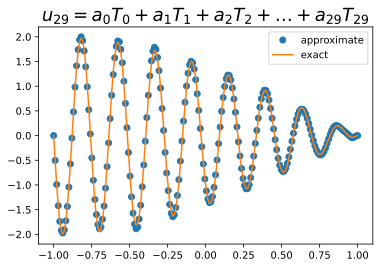

In [138]:
N = 30
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]
k = 4.0
f = rhs(x[1:N],k)
u = solve(D2,f)
s = zeros(N+1)
s[1:N] = u

xx = linspace(-1.0,1.0,200)
uu = polyval(polyfit(x,s,N),xx)    # interpolate grid data
exact = uexact(xx,k)
maxerr = norm(uu-exact,inf)

plt.title('$u_{'+str(N-1)+'} = a_0T_0+a_1T_1+a_2T_2+\\dots+a_{'+
          str(N-1)+'}T_{'+str(N-1)+'}$', fontsize=18)
plt.plot(xx,uu,'o',xx,exact,);
plt.legend(('approximate','exact'))
plt.savefig('hi.pdf')

In [67]:
k=8
cos((2.0*k+0.5)*pi)

2.443103791928823e-16